In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


How many rows and columns are in `gdp_df`? What are the data types of each column?

Rows = 7662
Columns = 4
DataTypes = string, integer, float, float

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [8]:
#Check to see what the column names look like
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [9]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [10]:
#Check to make sure it worked!
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [12]:
#Find how many years are represented in the data.
gdp_df['Year'].nunique()

33

In [13]:
#Count the values of each country. To show how many years are represented.
country_count = gdp_df['Country'].value_counts().reset_index()

In [14]:
country_count

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [15]:
#Find the countries that 33 years represented
country_count.loc[country_count['count'] == 33].count()

Country    202
count      202
dtype: int64

ANSWER: There are 202 countries that have data for all 33 years.Countries that are missing a lot of data include: Kosovo, Sint Maarten, Turks & Caicos Islands, Somalia, Djbouti

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [18]:
#Using our gdp dataframe, create a new dataframe that only shows the year 2020
year_2020 = gdp_df[gdp_df['Year']== 2020]

In [19]:
#Check it out
year_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

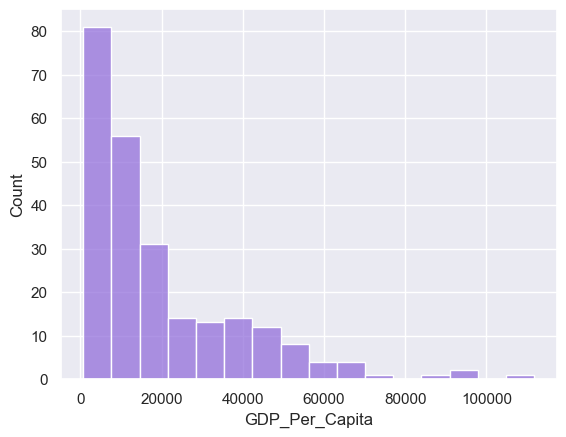

In [20]:
#Histogram
sns.set_theme(style="darkgrid")
sns.histplot(data=year_2020, x='GDP_Per_Capita', color = 'mediumpurple')

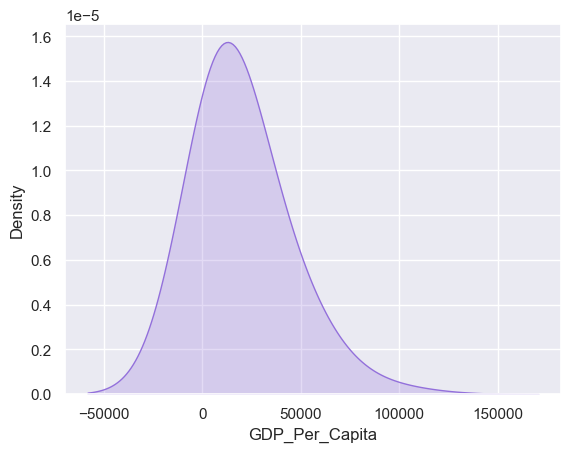

In [21]:
#Density Plot
sns.set_theme(style="darkgrid")
sns.kdeplot(year_2020['GDP_Per_Capita'], fill=True, color="mediumpurple", bw_method=1)
plt.show()

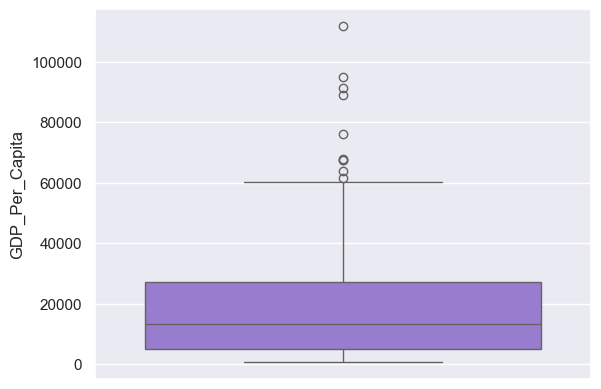

In [22]:
#Boxplot
sns.set_theme(style="darkgrid")
sns.boxplot(y=year_2020['GDP_Per_Capita'], color='mediumpurple')
plt.show()

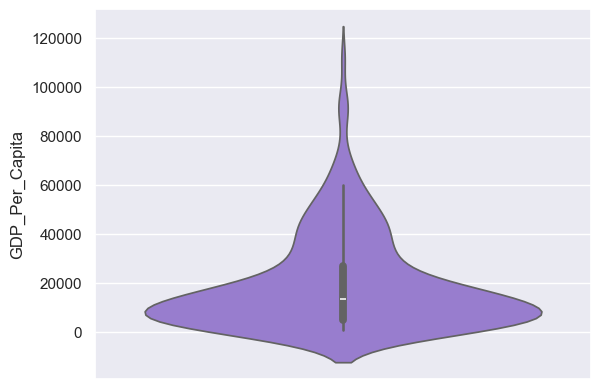

In [23]:
#Viiolin Chart
sns.set_theme(style="darkgrid")
sns.violinplot(y=year_2020["GDP_Per_Capita"], color='mediumpurple')
plt.show()

9. What was the median GDP per capita value in 2020?

In [25]:
print(year_2020['GDP_Per_Capita'].median())

13357.997573370474


Answer: 13,358

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [28]:
#Grab only the data that includes only the years needed
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

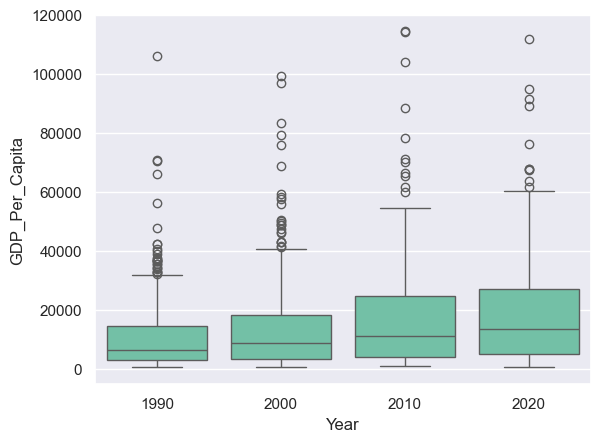

In [29]:
#Boxplot
sns.set_theme(style="darkgrid")
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], color='mediumaquamarine')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

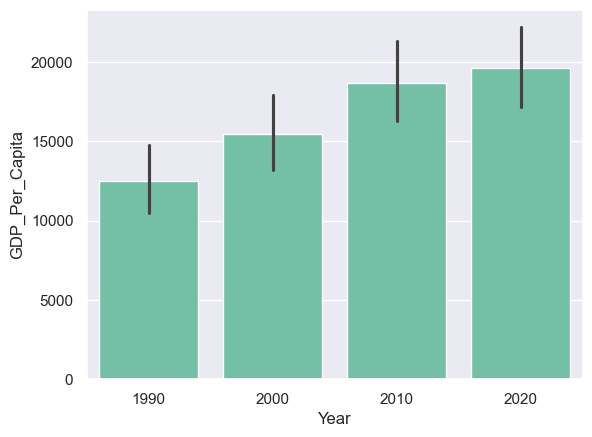

In [30]:
#Set the theme
sns.set_theme(style="darkgrid")
#Barplot
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    color='mediumaquamarine')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

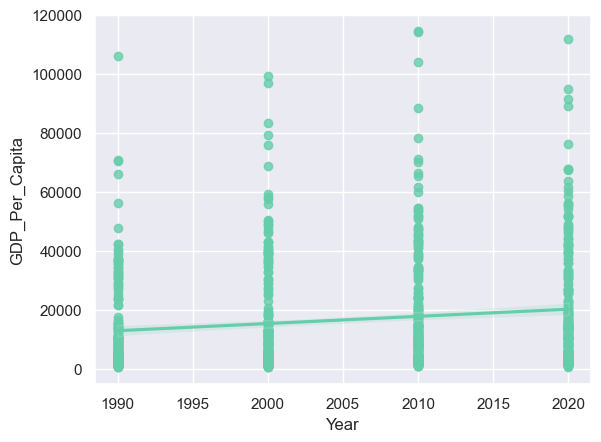

In [31]:

sns.set_theme(style="darkgrid")
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], color='mediumaquamarine')

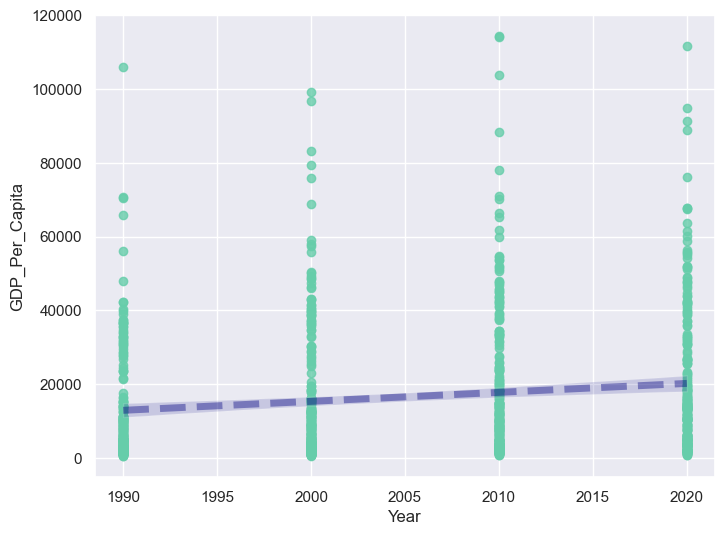

In [32]:
#Scatterplot with regression line
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"], color='mediumaquamarine',
    line_kws={
        "color": "navy",
        "alpha": 0.4,
        "lw": 5,
        "ls": "--"
    },
    ax=ax
)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [34]:
first_gdp = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year')
print(first_gdp)

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059
7301  United Arab Emirates  1991   101048.696239
7295  United Arab Emirates  1997   100956.706467
4167            Luxembourg  2001   101143.147977
4166            Luxembourg  2002   103317.331098
4165            Luxembourg  2003   104743.000088
4164            Luxembourg  2004   107634.837198
4163            Luxembourg  2005   108632.360016
4162            Luxembourg  2006   113346.035782
4161            Luxembourg  2007   120647.822959
4160            Luxembourg  2008   118154.667184
4159            Luxembourg  2009   112230.081410
5756                 Qatar  2010   103902.519310
4158            Luxembourg  2010   114343.988089
4191      Macao SAR, China  2010   114042.495308
4190      Macao SAR, China  2011   135365.387353
5755                 Qatar  2011   111879.747777
4157            Luxembourg  2011   112998.390477
4189      Macao SAR, China  2012   144891.341893
5754                

Answer: United Arab Emirates  1990

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [37]:
#Find the country with the highest GDP in 2020, by filtering the year in the dataset
highest_gdp = gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending = False)
print(highest_gdp)

                       Country  Year  GDP_Per_Capita
4148                Luxembourg  2020   111751.314751
6108                 Singapore  2020    94910.101431
3279                   Ireland  2020    91356.855054
5746                     Qatar  2020    89019.069857
681                    Bermuda  2020    76117.804744
...                        ...   ...             ...
5074                     Niger  2020     1214.546556
6273                   Somalia  2020     1127.418534
1630           Dem. Rep. Congo  2020     1044.071214
1217  Central African Republic  2020      847.765012
973                    Burundi  2020      711.355263

[242 rows x 3 columns]


In [38]:
#Create a dataframe that filters just Luxembourg data
luxembourg = gdp_df[gdp_df['Country'] == 'Luxembourg']
luxembourg.head()

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558


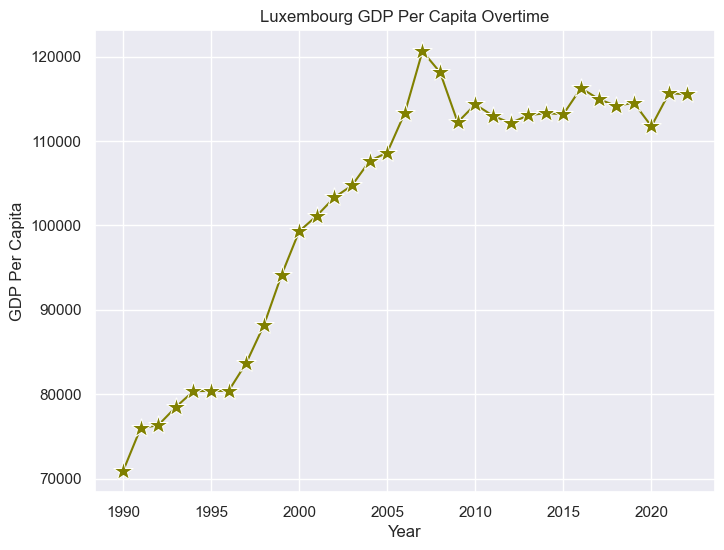

In [39]:
#Create a plot
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='Year',
             y='GDP_Per_Capita', color = 'olive',
             data=luxembourg,
             marker='*', # Style used to mark the join between 2 points
             markersize=15
            )
plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('Luxembourg GDP Per Capita Overtime') # Add a title
plt.show() # Display the graph

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [41]:
#Using the highest GDP dataframe, I can see that Burundi is at the bottom of the list.
burundi = gdp_df[gdp_df['Country'] == 'Burundi']
burundi.head()

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223


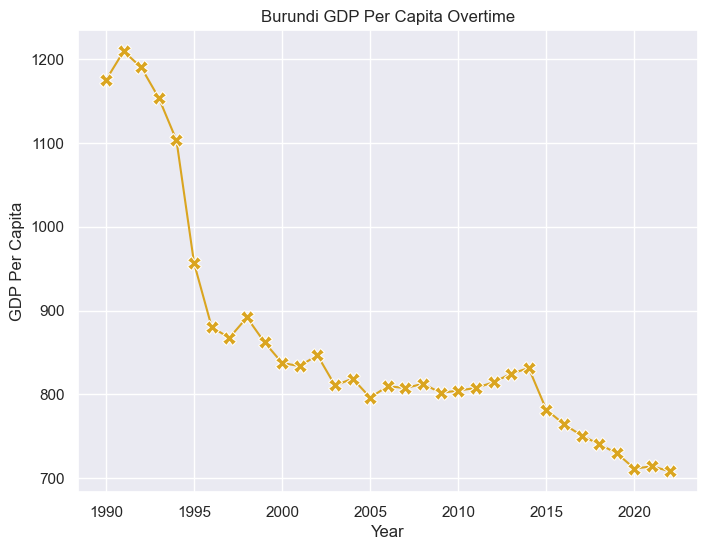

In [42]:
#Scatterplot
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='Year',
             y='GDP_Per_Capita', color = 'goldenrod',
             data=burundi,
             marker='X', # Style used to mark the join between 2 points
             markersize=10
            )
plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('Burundi GDP Per Capita Overtime') # Add a title
plt.show() # Display the graph

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [44]:
#It looks like reading in the csv caused an error, there are too many fields in one of the lines. Using on_bad_lines{‘error’, ‘warn’, ‘skip’} can help solve a problem caused by a line with too many fields 
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4
...,...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN,NaN
6376,294,Preliminary. Country estimate.,NaN,NaN
6377,295,18+. ITU estimate.,NaN,NaN
6378,296,ICT survey. Population age 11+,NaN,NaN


In [45]:
#Check the datatypes
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6380 non-null   object 
 1   Year             6380 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 199.5+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [47]:
internet_df = internet_df.drop('Value Footnotes', axis = 1).rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26
...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN
6376,294,Preliminary. Country estimate.,NaN
6377,295,18+. ITU estimate.,NaN
6378,296,ICT survey. Population age 11+,NaN


16. Look at the number of observations in this dataset per year. What do you notice?

In [83]:
internet_df.value_counts('Year')

Year
1990                                                                                    226
2007                                                                                    217
2002                                                                                    214
2008                                                                                    214
2011                                                                                    214
                                                                                       ... 
Figures for the population aged 6 and over. Data referring to the month of May 2016.      1
Excluding population living in workers’ camps.                                            1
Excluding game machine and digital TV.                                                    1
Excl. mobile Internet users.                                                              1
utilisteurs-trices d'internet au cours des 3 derniers mois                 

17. What is the first year to have a non-zero internet users percentage value?

In [111]:
#Filter the data to only include percentage over zero?
non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')
non_zero

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


Answer: 1990

 18. How does the distribution of internet users percent differ for 2000 and 2014?